# Finite difference solution of the one-dimensional non-linear convection equation

_Joshua R. Brinkerhoff,
UBC Okanagan,
joshua.brinkerhoff@ubc.ca_

_May 23, 2020_

## Introduction

The one-dimensional non-linear convection equation expresses how a wave travels through a medium without any diffusion (i.e. viscosity or friction). The equation is expressed as
$$ \dfrac{\partial u}{\partial t} + u \dfrac{\partial u}{\partial x} = 0 $$
where $u$ is the solution variable that represents the amplitude of the wave in time. This equation is also called the inviscid Burgers' equation, after [Jan Martinus Burgers](https://en.wikipedia.org/wiki/Jan_Burgers), a Dutch-American physicist who studied it in the 1940s. It is inviscid because there is no viscous term present that would tend to diffuse out the amplitude of the wave.

Burgers' equation is clearly a non-linear, one-dimensional PDE because of the variable coefficient multiplying the spatial derivative term. The form given above is often referred to as the _advective_ form. The equation can be re-expressed in _conservation_ form as
$$ \dfrac{\partial u}{\partial t} + \dfrac{\partial F}{\partial x} = 0 $$
where $F$ is a conserved flux vector, $F = u^2 / 2$. The equation can also be re-expressed in conservation form by defining a flux Jacobian $A = \partial F / \partial u$:
$$ \dfrac{\partial u}{\partial t} + A \dfrac{\partial u}{\partial x} = 0. $$
In the one-dimensional case considered here, $A = \partial F / \partial u = u$.



## Numerical methods

### Lax method

The [Lax method](https://en.wikipedia.org/wiki/Lax%E2%80%93Friedrichs_method) is obtained from the conservation form of the inviscid Burgers equation. We can approximate the time derivative with a forwards finite difference,
$$ \dfrac{\partial u}{\partial t} \approx \dfrac{u_j^{n+1} - u_j^n}{\Delta t},$$
where $\Delta t$ is a small time increment (time step).

We can also approximate the spatial derivative with a centered finite difference,
$$ \dfrac{\partial F}{\partial x} \approx \dfrac{F_{j+1}^n - F_{j-1}^n}{2\Delta x},$$
where $\Delta x$ is a small space increment (grid cell).

Using these approximations in the conservative Burgers' equation yields
$$ \dfrac{u_j^{n+1} - u_j^n}{\Delta t} + \dfrac{F_{j+1}^n - F_{j-1}^n}{2\Delta x} = 0 $$
or
$$ u_j^{n+1} = u_j^n - \dfrac{\Delta t}{2 \Delta x} \left(F_{j+1}^n - F_{j-1}^n \right). $$
This approximation is known as the _Euler explicit method_. It is simple, but unfortunately it can be shown to be unstable (i.e. it cannot yield a stable solution) for all values of $\Delta t$ and $\Delta x$, making it pretty useless. 

The Euler explicit method can be make stable if the $u_j^n$ term is replaced with the average of the adjacent nodes at the same time step. Doing so yields a stable scheme called the _Lax method_ :
$$ \boxed{u_j^{n+1} = \dfrac{u_{j+1}^n + u_{j-1}^n}{2} - \dfrac{\Delta t}{2 \Delta x} \left(F_{j+1}^n - F_{j-1}^n \right)}. $$

The Lax method is first-order accurate in time and second-order accurate in space. This means that will tend to _dissipate_ waves that are convecting in through the solution domain, which is undesirable.

### Lax-Wendroff method

The [Lax-Wendroff](https://en.wikipedia.org/wiki/Lax%E2%80%93Wendroff_method) method aims to improve upon the Lax method by being second-order accurate in time. One could achieve this by using a centered finite difference for the temporal derivative. However, it can be shown that this results in an desirable de-coupling of the solution between odd and even nodes (the so-called leapfrog effect), plus it requires information at three time levels $n-1$, $n$, and $n+1$ which implies more storage requirements. Both of these are undesirable features. Therefore, the Lax-Wendroff method aims to avoid them.

The derivation is straight-forward. Begin with a Taylor series expansion in the following form:
\begin{equation}
u(x,t+\Delta t) = u(x,t) + \Delta t \left(\dfrac{\partial u}{\partial t}\right)_{x,t} + \dfrac{(\Delta t)^2}{2} \left(\dfrac{\partial^2 u}{\partial t^2}\right)_{x,t} + \cdots
\end{equation}
The first time derivative can be directly replaced using the original governing equation, but to deal with the second-derivative term, we need to examine it more closely. Taking the time derivative of the conservation form yields
\begin{equation}
\dfrac{\partial^2 u}{\partial t^2} = -\dfrac{\partial^2 F}{\partial t \partial x} = -\dfrac{\partial^2 F}{\partial x \partial t} = -\dfrac{\partial }{\partial x} \left(\dfrac{\partial F}{ \partial t}\right)
\end{equation}
where the order of differentiation has been interchanged. Now $F = F(u)$, which permits us to write
\begin{equation}
\dfrac{\partial u}{\partial t} = - \dfrac{\partial F}{\partial x} = -\dfrac{\partial F}{\partial u}\dfrac{\partial u}{\partial x} = - A \dfrac{\partial u}{\partial x}
\end{equation}
and
\begin{equation}
\dfrac{\partial F}{\partial t} = \dfrac{\partial F}{\partial u} \dfrac{\partial u}{\partial t} = A \dfrac{\partial u}{\partial t}
\end{equation}
Hence we may replace $\partial F / \partial t$ with
\begin{equation}
\dfrac{\partial F}{\partial t} = -A \dfrac{\partial F}{\partial x}
\end{equation}
so that
\begin{equation}
\dfrac{\partial^2 u}{\partial t^2} = \dfrac{\partial}{\partial x} \left(A \dfrac{\partial F}{\partial x}\right)
\end{equation}
It is clear that the Jacobian $A$ contains a single element for the Burgers' equation, but it is a matrix when $u$ and $F$ are vectors in treating a system of equations. Making the appropriate substitution in the Taylor series expansion for $u$, we obtain
\begin{equation}
u(x, t+\Delta t) = u(x,t) - \Delta t \dfrac{\partial F}{\partial x} + \dfrac{(\Delta t)^2}{2} \dfrac{\partial }{\partial x}\left( A \dfrac{\partial F}{\partial x} \right) + \cdots
\end{equation}
and after using central differencing, the Lax-Wendroff method is obtained:
\begin{equation}
\boxed{
u_j^{n+1} = u_j^n - \dfrac{\Delta t}{\Delta x}\dfrac{F_{j+1}^n - F_{j-1}^n}{2} + \dfrac{1}{2}\left(\dfrac{\Delta t}{\Delta x}\right)^2 \left[ A_{j+1/2}^n (F_{j+1}^n - F_j^n) - A_{j-1/2}^n (F_j^n - F_{j-1}^n) \right]}
\end{equation}
The Jacobian matrix is evaluated at the half interval, that is,
\begin{equation}
A_{j+1/2} = A\left( \dfrac{u_j + u_{j+1}}{2} \right)
\end{equation}
In Burgers' equation, $F = u^2/2$ and $A = u$. In this case, $A_{j+1/2} = (u_j + u_{j+1})/2$ and $A_{j-1/2} = (u_j + u_{j-1})/2$.

### MacCormack method

The predictor-corrector method described by [MacCormack](https://en.wikipedia.org/wiki/MacCormack_method) is much easier to apply to the Burgers' equation because the Jacobian $A$ does not appear. When applied to the inviscid Burgers' equation, the MacCormack method becomes
\begin{equation}
\boxed{
\begin{split}
\text{Predictor: } \quad u_j^{\overline{n+1}} &= u_j^n - \dfrac{\Delta t}{\Delta x}\left(F_{j+1}^n - F_j^n \right) \\
\text{Corrector: } \quad u_j^{n+1} &= \dfrac{1}{2} \left[ u_j^n + u_j^{\overline{n+1}} - \dfrac{\Delta t}{\Delta x}\left(F_j^{\overline{n+1}} - F_{j-1}^{\overline{n+1}}\right) \right]
\end{split}
}
\end{equation}
It should be noted that reversing the order of differencing in the predictor and corrector steps leads to very different results; the best results is obtained when the differencing in the predictor step is in the direction of propagation of the discontinuity, and the order is reversed on alternating time steps (i.e. backward/forward followed by forward/backward).

## Problem statement

Solve the one-dimensional non-linear convection equation subject to the initial condition
$$ u(x,0) = \sin(x) + 0.5 \sin(0.5 x)$$
in the domain $0 \leq x \leq 2\pi$. The domain has periodic boundaries, meaning that waves that travel out of one boundary are reintroduced at the opposite boundary. 

We will use the above three _explicit_ numerical schemes:
1. Lax method
2. Lax-Wendroff method
3. MacCormack method

We will use a time step size of $\Delta t = 0.1$

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math

Define parameters:

In [59]:
nu = 0.5       # CFL number
dt = 0.01      # time step
T = 500        # max number of time steps
dx = dt/nu     # space step
L = 2*math.pi  # domain length

## Define space vector
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)

## Define initial conditions
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)

Step size = 0.02001014429038085 s
Number of x nodes = 315


__MacCormack method:__

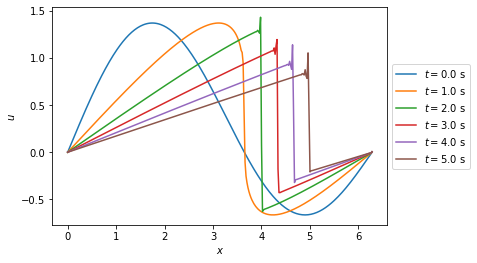

In [53]:
for t in range(0,T):
    if (t % 2 == 0): # even time; use forward for predictor, backward for corrector
        #forwards predictor step
        for i in range(0,nx-1):
            ustar[i] = u[i] - 0.5*nu*(u[i+1]**2 - u[i]**2)
        ustar[i] = u[i] - 0.5*nu*(u[1]**2 - u[i]**2)
        
        #backwards corrector step
        unp1[0] = 0.5*( u[0] + ustar[0] - 0.5*nu*(ustar[0]**2 - ustar[nx-2]**2))
        for i in range(1,nx):
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i]**2 - ustar[i-1]**2))
            
    else: # odd time; use backward for predictor, forward for corrector
        # backwards predictor step
        ustar[0] = u[0] - 0.5*nu*(u[0]**2 - u[nx-2]**2)
        for i in range(1,nx):
            ustar[i] = u[i] - 0.5*nu*(u[i]**2 - u[i-1]**2)
        
        #forwards corrector
        for i in range(0,nx-1):
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i+1]**2 - ustar[i]**2))
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[1]**2 - ustar[i]**2))
    
    u=np.copy(unp1)

    if (t % 100 == 0):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
    
uM = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

This solution illustrates one of the key features of the non-linear convection equation: _the solution is discontinuous_. The discontinuity moves in the positive $x$ direction as the solution progresses. This is analogous to a wave breaking as it approaches the shore.

The MacCormack method can capture the abruptness of the discontinuity quite well. However, note that high-frequency oscillations are present in the solution on the downstream side. This is referred to as _lagging phase error_, which is more generally a type of _dispersion_ error: high-frequency oscillations that are created near a discontinuity in the solution. Dispersion error is characteristics of second-order methods, of which MacCormack method is a good example.

__Lax-Wendroff method__

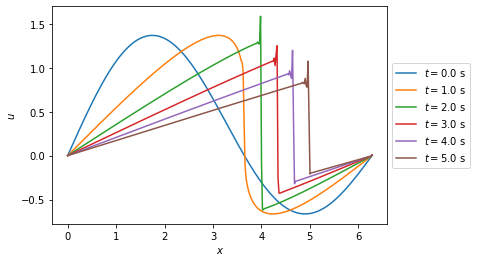

In [54]:
u = np.copy(u0)
for t in range(0,T):
    Ajp = 0.5*(u[0] + u[1])
    Ajm = 0.5*(u[0] + u[nx-2])
    unp1[0] = u[0] - 0.25*nu*(u[1]**2 - u[nx-2]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[0]**2) \
                                 - 0.5*Ajm*(u[0]**2 - u[nx-2]**2)
                                )
    for i in range(1,nx-1):
        Ajp = 0.5*(u[i] + u[i+1])
        Ajm = 0.5*(u[i] + u[i-1])
        unp1[i] = u[i] - 0.25*nu*(u[i+1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[i+1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)
                                )
    Ajp = 0.5*(u[i] + u[1])
    Ajm = 0.5*(u[i] + u[i-1])
    unp1[i] = u[i] - 0.25*nu*(u[1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)
                                )
    u=np.copy(unp1)
    
    if (t % 100 == 0):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
    
uLW = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The Lax-Wendroff solution is very similar to the MacCormack method. In fact, the difference between the solutions obtained from the two methods is essentially negligible.

__Lax method__

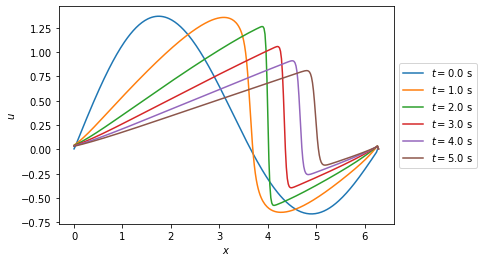

In [57]:
u = np.copy(u0)
for t in range(0,T):
    unp1[0] = 0.5*(u[1]+u[nx-2]) - 0.25*nu*(u[1]**2 - u[nx-2]**2)
    for i in range(1,nx-1):
        unp1[i] = 0.5*(u[i+1]+u[i-1]) - 0.25*nu*(u[i+1]**2 - u[i-1]**2)
    unp1[i] = 0.5*(u[1]+u[i-1]) - 0.25*nu*(u[1]**2 - u[i-1]**2)
    u=np.copy(unp1)
    
    if (t % 100 == 0):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)

uL = np.copy(u)    
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Note how the solution experiences dissipation--a gradual smearing out of the discontinuity. This is characteristic of first-order methods, of which Lax method is a good example.

__Comparison plot__

We want to compare the solution obtained by the three numerical methods at time $t$ = 5 seconds:

Text(0.5, 1.0, 'Solution at $t$ = 5 s')

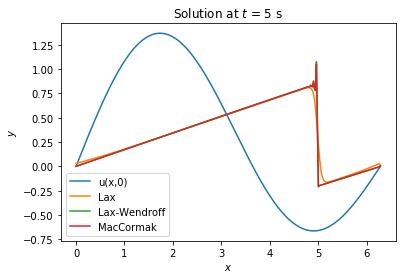

In [61]:
plt.plot(x,u0,label='u(x,0)')
plt.plot(x,uL,label='Lax')
plt.plot(x,uLW,label='Lax-Wendroff')
plt.plot(x,uM,label='MacCormak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower left')
plt.title('Solution at $t$ = 5 s')

### Further consideration of MacCormack method

In the above, we alternated the direction of the finite difference in the predictor and corrector steps of the MacCormack method. Let's examine a case where we do not alternate the direction. In fact, we'll examine two cases: 
1. Forwards predictor and backwards corrector
2. Backwards predictor and forwards corrector

We'll compare the solution that we get from the above two cases with the solution obtained from alternating the direction of the finite differences.

__1. Forwards predictor and backwards corrector:__

In [64]:
u = np.copy(u0)
for t in range(0,T):
    #forwards predictor step
    for i in range(0,nx-1):
        ustar[i] = u[i] - 0.5*nu*(u[i+1]**2 - u[i]**2)
    ustar[i] = u[i] - 0.5*nu*(u[1]**2 - u[i]**2)
        
    #backwards corrector step
    unp1[0] = 0.5*( u[0] + ustar[0] - 0.5*nu*(ustar[0]**2 - ustar[nx-2]**2))
    for i in range(1,nx):
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i]**2 - ustar[i-1]**2))
            
    u=np.copy(unp1)
uMfb = np.copy(u)

__2. Backwards predictor and forwards corrector:__

Text(0, 0.5, 'Difference from alternating direction solution')

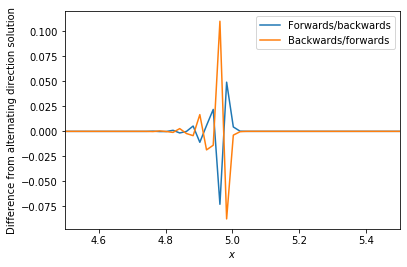

In [74]:
u = np.copy(u0)
for t in range(0,T):
    # backwards predictor step
    ustar[0] = u[0] - 0.5*nu*(u[0]**2 - u[nx-2]**2)
    for i in range(1,nx):
        ustar[i] = u[i] - 0.5*nu*(u[i]**2 - u[i-1]**2)
        
    #forwards corrector
    for i in range(0,nx-1):
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i+1]**2 - ustar[i]**2))
    unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[1]**2 - ustar[i]**2))
            
    u=np.copy(unp1)
uMbf = np.copy(u)

plt.plot(x,uMfb-uM,label='Forwards/backwards')
plt.plot(x,uMbf-uM,label='Backwards/forwards')
plt.xlim(4.5,5.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('Difference from alternating direction solution')

The difference between the solutions is zero everywhere except near the discontinuity, where the difference between the solutions is largest for the backwards/forwards cases. As discussed in the introduction, we see that the best solution performance (at least, the one that has the smallest difference to the alternating solution) is when the predictor step is taken in the direction of the propagating wave.

In general, we won't know what direction the wave will propagate. Therefore, we can hedge our bets by alternating the direction of the finite differences.